# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarentena, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



# **Importación de librerías**

In [ ]:
# Librería para medir tiempos
from datetime import datetime
# Librerías para la importación de archivos
import numpy as np
import pandas as pd
import pylab as plt
from google.colab import drive
# Librerías para gráficos
import seaborn as sns
# Librerías para modelado
from scipy.optimize import curve_fit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
## Librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV


# Defino mi matriz de confusión: 

def confusion(ytest,y_pred):
    names=["0","1"]
    cm=confusion_matrix(ytest,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [ ]:
# Tomamos el tiempo de inicio de ejecución
start_time = datetime.now()

In [ ]:
WORK_WITH_SAMPLE = False # Línea que nos permite trabajar con una muestra de nuestros datos.

**¡Atención estimado evaluador!** Esta línea simplemente busca optimizar el tiempo. A considerar, para este cuaderno donde no es necesaria dado que el tiempo de recargar no es considerable. Pero resulta una buena practica para trabajar con un muestreo de los datos y ganar tiempo en la etapa de exploración y pruebas. Poder verificar que ninguna línea arroja error sin tener que ocupar el tiempo que demanda trabajar con millones de datos. De esta manera se puede trabajar con una muestra parcial de los datos, ayudando a que el código “corra” mucho más rápido y termine antes la etapa de construicción del informe.

---



In [ ]:
# Conectamos con Drive

drive.mount('/content/gdrive', force_remount=True)

# ¡Atención! Acá levanto los datos de mi carperta "Drive"
root_dir = "/content/gdrive/My Drive/Proyecto_final_Acamica"



Mounted at /content/gdrive


In [ ]:
# Importo los datos
datos=pd.read_csv('/content/gdrive/My Drive/Proyecto_final_Acamica/covid-tests-cases-deaths-per-million.csv')
datos.head()

,Entity,Code,Day,total_tests_per_thousand,142605-annotations,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people
0,Afghanistan,AFG,2020-02-24,NaN,NaN,0.126,NaN
1,Afghanistan,AFG,2020-02-25,NaN,NaN,0.126,NaN
2,Afghanistan,AFG,2020-02-26,NaN,NaN,0.126,NaN
3,Afghanistan,AFG,2020-02-27,NaN,NaN,0.126,NaN
4,Afghanistan,AFG,2020-02-28,NaN,NaN,0.126,NaN


In [ ]:
# Veo los tipos datos para asegurarme que no haya valores númericos que esten cargados como cadena u objeto.
datos.dtypes

Entity                                                        object
Code                                                          object
Day                                                           object
total_tests_per_thousand                                     float64
142605-annotations                                            object
Total confirmed cases of COVID-19 per million people         float64
Total confirmed deaths due to COVID-19 per million people    float64
dtype: object

In [ ]:
# Imprimo cuántas filas y columnas tiene nuestro dataset.
print('Cantidad de filas y columnas:',datos.shape)

Cantidad de filas y columnas: (123018, 7)


In [ ]:
# Convertimos a numéricos todos aquellos atributos que debieran serlo.
datos = datos.apply(pd.to_numeric, errors='ignore')

# Quitamos las columnas que contengan únicamente NaNs.
datos = datos.dropna(how='all', axis= 1)

In [ ]:
# Definimos con cuantos datos hacemos nuestra muestra. 
if WORK_WITH_SAMPLE:
    datos = datos.sample(n=10000, random_state=42)

In [ ]:
# Me quedo con los datos de países únicos
paises_unicos = datos.Entity.unique()

In [ ]:
paises=datos['Entity'] # Cargo el vector de países
confirmados=datos['Total confirmed cases of COVID-19 per million people'] # Cargo el vector de todos los casos confirmados

Text(0, 0.5, 'cantidad de casos')

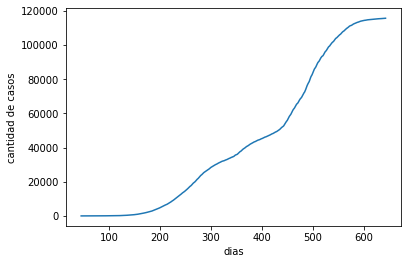

In [ ]:
# Seleccionamos Argentina

ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')



Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

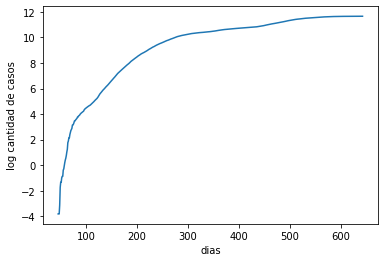

In [ ]:
# Graficó
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 60 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos')

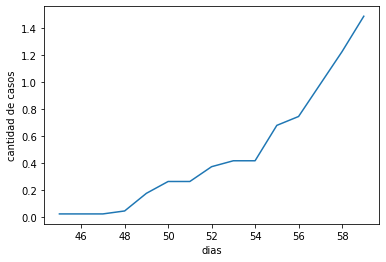

In [ ]:
casos_principio=casos_arg[0:60]
dias_principio=dias[0:60]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

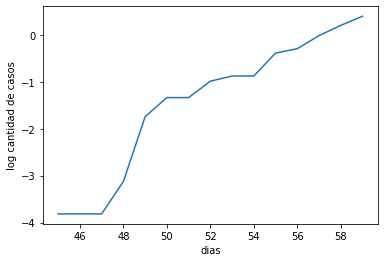

In [ ]:

plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 49 y 60, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

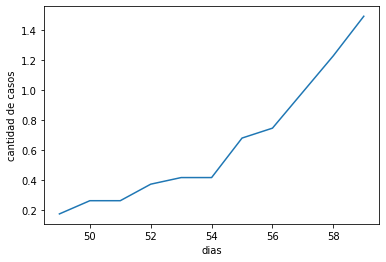

In [ ]:
casos_principio=casos_arg[49:60]
dias_principio=dias[49:60]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

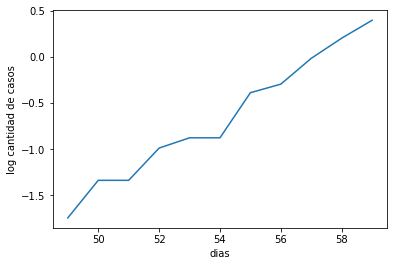

In [ ]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [ ]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [ ]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 0.21435383, 57.12039686])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

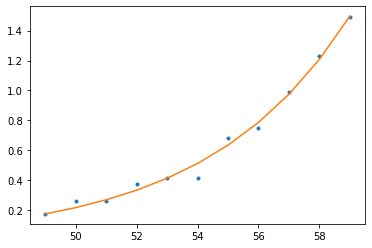

In [ ]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [ ]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

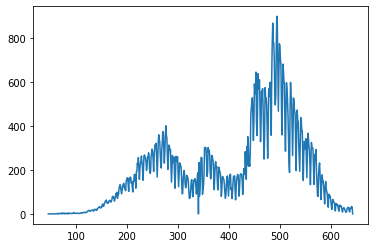

In [ ]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

# **Inicio: Parte 1**

Vamos a armar las curvas de casos  Confirmados=ek(t−t0)  por millón, para los 10 países elegidos.
Queremos responder a la siguiente pregunta: ¿Es posible estimar el comportamiento de la curva exponencial de contagios por millón de habitantes mundial, con la información obtenida de los ritmos de contagios de los países seleccionados?

**Vamos a averiguarlo.**

In [ ]:
# Selecionamos los intervalos de días para los distitnos países.

data_2=pd.read_csv('/content/gdrive/My Drive/Proyecto_final_Acamica/covid-tests-cases-deaths-per-million.csv')
paises = ['Andorra', 'Austria','Canada', 'Egypt', 'France','Israel','Japan', 'Qatar', 'Saudi Arabia', 'Sweden','World']
data_2_select = data_2[(data_2['Entity'].isin(paises))]
data_2_world  = data_2[(data_2['Entity'].isin(['World']))]

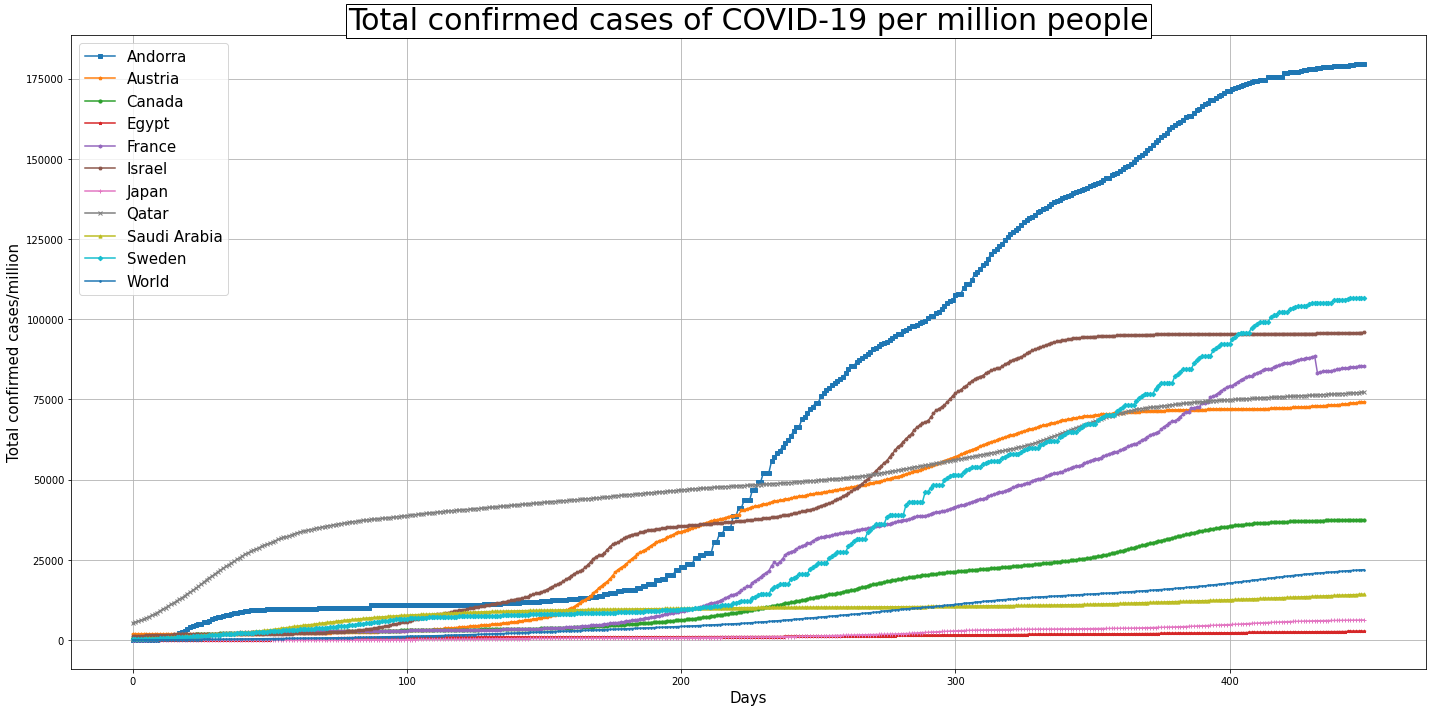

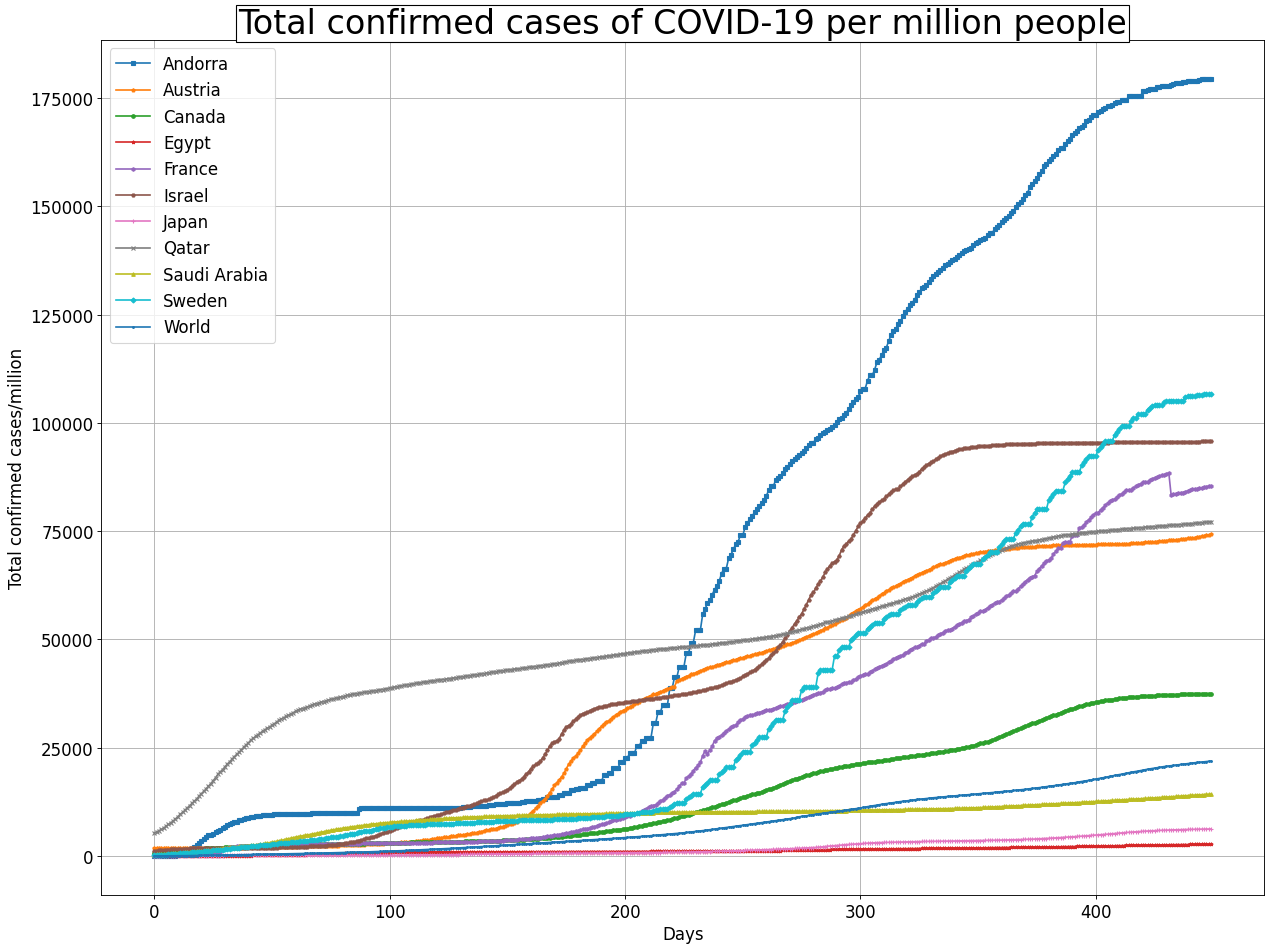

In [ ]:
# Graficamos.
i = 0
fig, ax = plt.subplots(figsize=[20,10])
marks = ["s","p","o","*","h","H","+","x","^","D",".","*"]

for pais in paises:
   casos_pais = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == pais)][50:500]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Total confirmed cases of COVID-19 per million people', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D",".","*"]

for pais in paises:
   casos_pais = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == pais)][50:500]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Total confirmed cases of COVID-19 per million people', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

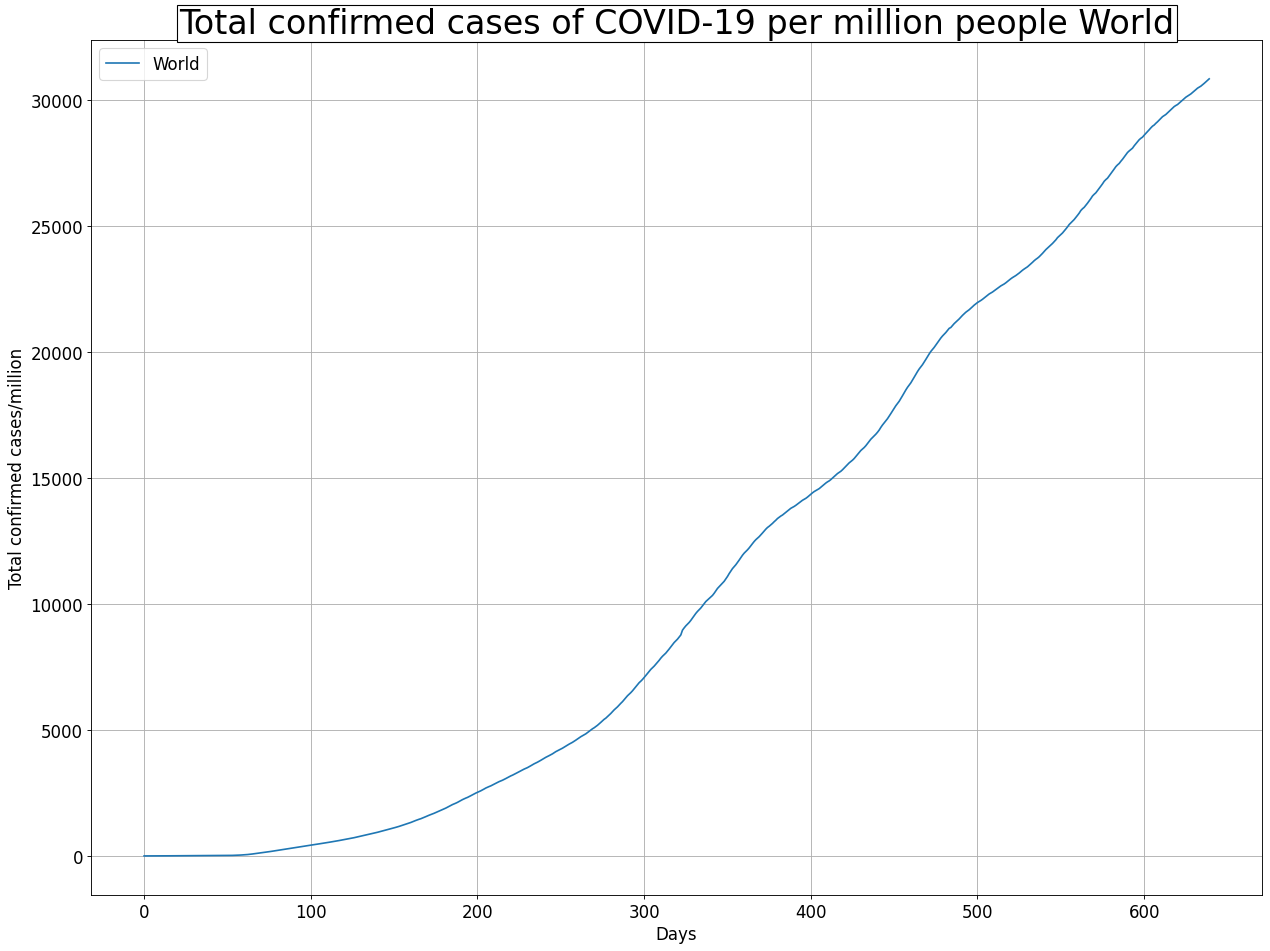

In [ ]:
casos_world = data_2_world['Total confirmed cases of COVID-19 per million people']
dias = np.arange(casos_world.shape[0]) 

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias,casos_world, label = 'World')
plt.title('Total confirmed cases of COVID-19 per million people World', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

In [ ]:
#  Filtramos el data set ajustando los intervalos por cada país para calcular la k.
dataFiltrada = {'Pais':  ['Andorra','Austria','Canada','Egypt','France','Israel','Japan','Qatar','Saudi Arabia','Sweden','World'],
       'DiaInicial': [200,150,200,50,200,120,250,0,50,200,200],
        'DiaFinal': [300,250,300,150,300,220,350,100,150,300,300]}

df = pd.DataFrame(dataFiltrada)

ks = []
for i in range(df.shape[0]):
 casosParaCalcularK = data_2_select['Total confirmed cases of COVID-19 per million people'][(data_2_select.Entity == df.Pais[i])][df.DiaInicial[i]:df.DiaFinal[i]]
 popt, pcov = curve_fit(exponencial, np.arange(df.DiaInicial[i],df.DiaFinal[i]), casosParaCalcularK, maxfev = 2000)
 ks.append(popt[0])
df['Ks'] = ks
# Vemos las k para los 10 países
ks

[0.023217516287849384,
 0.02987605890927326,
 0.014471110627710447,
 0.03175440124452945,
 0.025791440359003704,
 0.021500266200506477,
 0.015434763563858221,
 0.03521277242538076,
 0.021575154346779157,
 0.012232154345006574,
 0.009962291175470149]

In [ ]:
# Vamos ahora por la K para Wolrd.
d_world      = np.arange(200,301)
casos_world  = data_2_world['Total confirmed cases of COVID-19 per million people'][(data_2_world.Entity == 'World')][200:301]

# Ajustamos 

popt, pcov = curve_fit(exponencial, d_world , casos_world, maxfev = 2000)

k_world = popt[0]
k_world

0.009979911357953303

**Nota: **El k del mundo no cae dentro del intervalo de confianza. Eso se debe a que los intervalos de días que tomamos, representan intervalos de C(t) con K muy variables entre países respecto de una curva de C(t) que se ve mas suavizada para los casos mundiales.

##  Bootstrap e intervalo de confianza: Parte 1.B

In [ ]:
# Bootstrap

def remuestreo(datos):
  remuestra=np.zeros(len(datos))
  i=0
  while i<len(datos):
    remuestra[i]=datos[np.random.randint(len(datos))]
    i=i+1
  return remuestra  

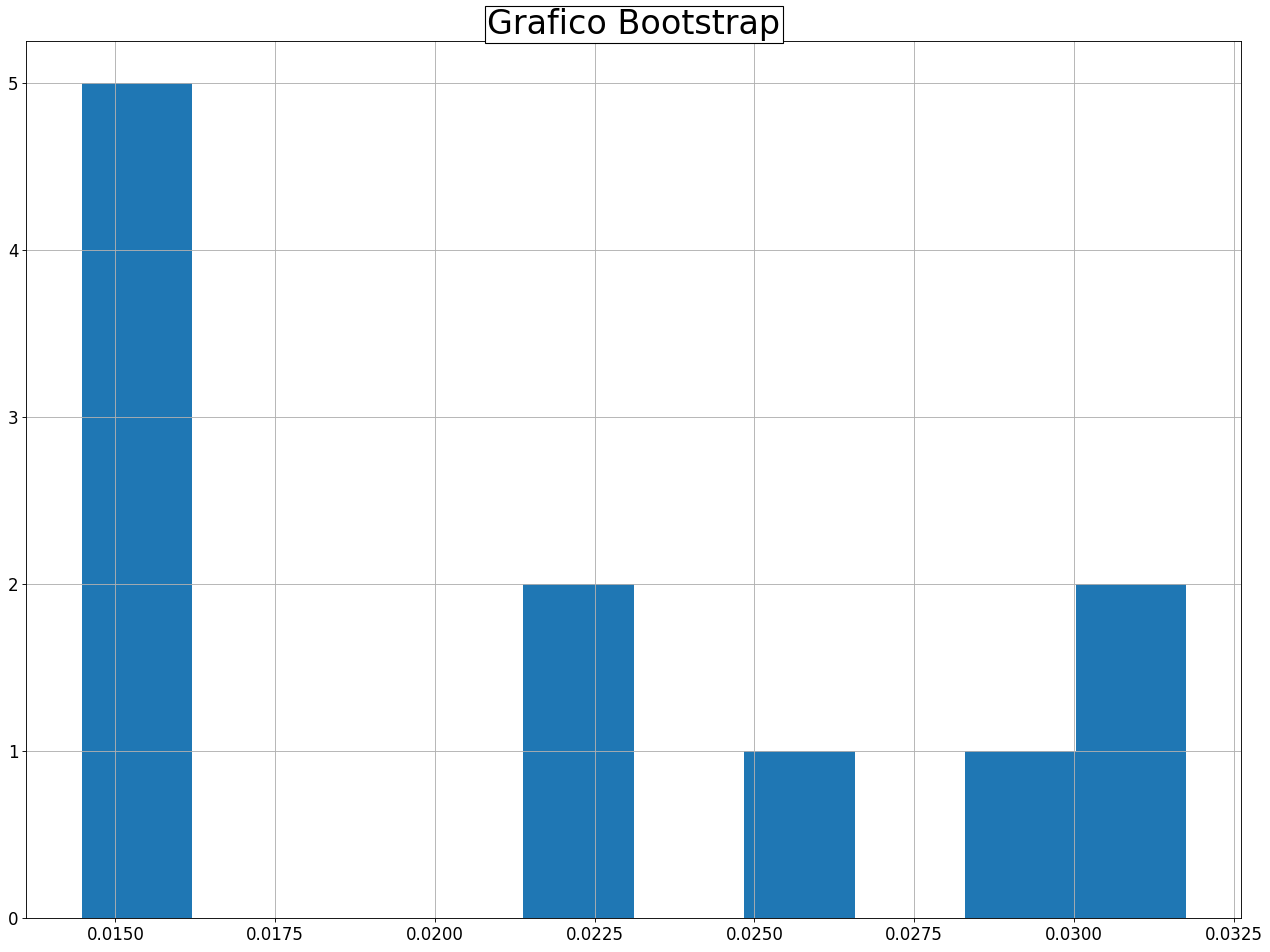

In [ ]:
datos_rem=remuestreo(ks)
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.hist(datos_rem)
plt.title('Grafico Bootstrap', fontsize=30,bbox={'facecolor':'1','pad':2})
ax.set_ylabel('Average rating',fontsize=13)
plt.tight_layout()
plt.grid()
plt.show ()

0.02183510797856224


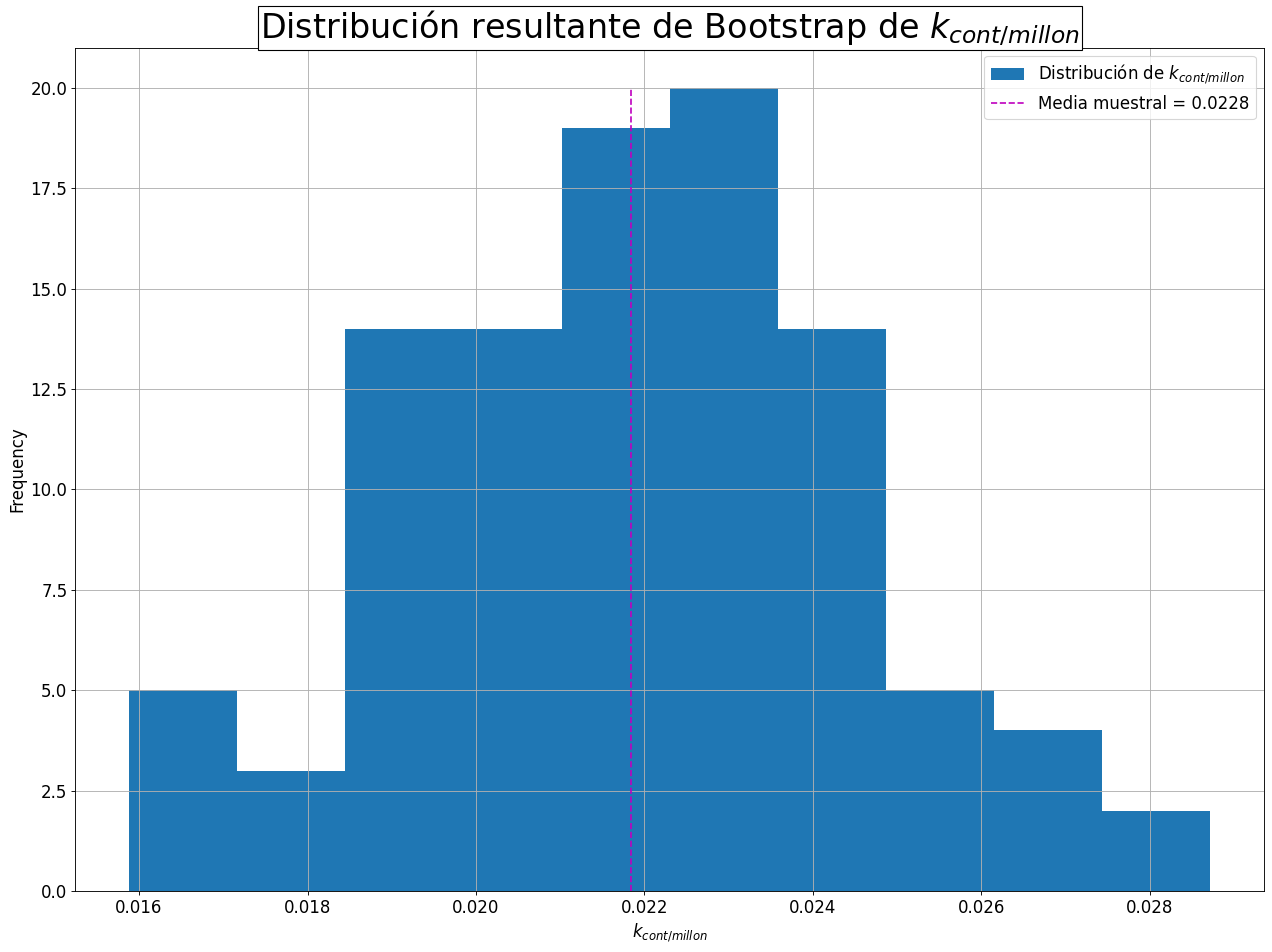

In [ ]:
# Bootstrap:

np.random.seed(8) # Elegir semilla.
nrep = 100
datos_100 = ks # Tenemos las k de los 10 países
medias = []

for i in np.arange(nrep):
  datos_rem=remuestreo(datos_100)
  medias.append(np.mean(datos_rem))

mu_muestra    = np.mean(medias)
sigma_muestra = np.std(medias)
print(np.mean(medias))

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.hist(medias, histtype = 'stepfilled',label = 'Distribución de $k_{cont/millon}$')
plt.vlines(mu_muestra, 0, 20, colors='m', linestyles='dashed', label='Media muestral = 0.0228')
plt.title('Distribución resultante de Bootstrap de $k_{cont/millon}$', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('$k_{cont/millon}$', fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

En este caso si $\alpha=0.05$, corresponde $z_{aplha}=1.96$.

In [ ]:
## Intervalo de conf:
z=1.96
n=len(medias)
int_conf=[mu_muestra-z*sigma_muestra/np.sqrt(n),mu_muestra+z*sigma_muestra/np.sqrt(n)]
print(int_conf)
# Calcular el p valor.

[0.021318913081406987, 0.022351302875717495]


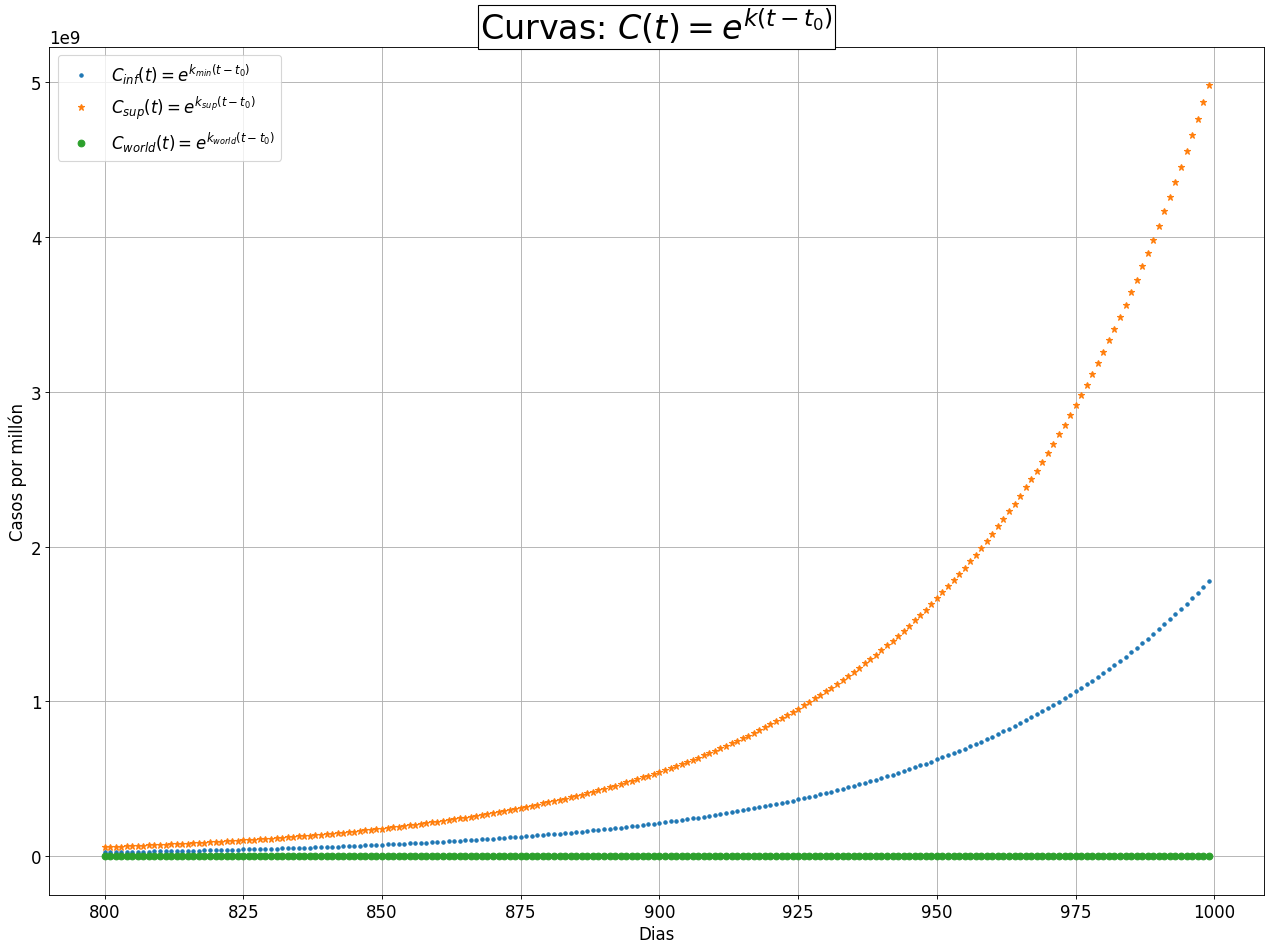

In [ ]:
# Graficos de curvas:
k_min = int_conf[0]
k_max = int_conf[1]
k_mundo = k_world

dias_principio = np.arange(800,1000)

casos_simu_min=exponencial(dias_principio,k_min,0)
casos_simu_max=exponencial(dias_principio,k_max,0)
casos_simu_world=exponencial(dias_principio,k_mundo,0)

plt.figure(figsize=(8*scale, 6*scale), dpi=80)
plt.plot(dias_principio,casos_simu_min,'.', label = '$C_{inf}(t)=e^{k_{min}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_max,'*', label = '$C_{sup}(t)=e^{k_{sup}(t-t_0)}$')
plt.plot(dias_principio,casos_simu_world,'o', label = '$C_{world}(t)=e^{k_{world}(t-t_0)}$')
plt.title('Curvas: $C(t)=e^{k(t-t_0)}$',fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.xlabel('Dias',fontsize = 15)
plt.ylabel('Casos por millón',fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

## Nota: El k del mundo no cae dentro del intervalo de confianza. Eso se da porque los intervalos de dias que tomamos, representan intervalos de C(t) con K muy variables entre países respecto de una vurva de C(t) que se ve mas suavizada para los casos mundiales.
PARTE 2

In [ ]:
## Buscar paises que hiciero o no cuarentena:
# Menos cuarentena: 0
  # Brazil
  # Venezuela
  # INDIA
  # Bolivia
  # Sweden
  # UY
  # Holanda
  # Mexico
  # Corea del sur
  # Singapur
  # Dominican Republic

# Mas cuarentena: 1
  # Argentina
  # Italia
  # China
  # España
  # NZ
  # Aus
  # Noruega
  # Alemania
  # Francia
  # UK 
  # Peru

  ## Armo lista de países con y sin cuarentena:
paises_0 = ['Brazil','Venezuela','India','Bolivia','Sweden','Uruguay','Netherlands','Mexico','South Korea','Singapore','Dominican Republic']
paises_1 = ['Argentina','Italy','China','Spain','New Zealand','Australia','Norway','Germany','France','United Kingdom','Peru']
all_paises = ['Brazil','Venezuela','India','Bolivia','Sweden','Uruguay','Netherlands','Mexico','South Korea','Singapore','Dominican Republic',
              'Argentina','Italy','China','Spain','New Zealand','Australia','Norway','Germany','France','United Kingdom','Peru']
cuarentena = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
print(paises_unicos)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Canada, people tested' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe' 'European Union'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'High income' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ir

In [ ]:
## Selecciono la data para armar los 3 indicadores estadísticos para cada país: 
# Mis estadísricos van a ser:
# k de muertes por millon: k_deths_mil
# k de contagios por millon: k_ill_mil
# ratio muertes = muertes/casos confirmados.

# Armo el data set vacío con todos los países:
dat = {'Pais': all_paises, 'k_deaths_mil': np.zeros(len(all_paises)), 'k_ill_mil': np.zeros(len(all_paises)), 'ratio_deaths_cases': np.zeros(len(all_paises)),'target': cuarentena}  
data_ml = pd.DataFrame(dat)
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Brazil,0.0,0.0,0.0,0
1,Venezuela,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Sweden,0.0,0.0,0.0,0
5,Uruguay,0.0,0.0,0.0,0
6,Netherlands,0.0,0.0,0.0,0
7,Mexico,0.0,0.0,0.0,0
8,South Korea,0.0,0.0,0.0,0
9,Singapore,0.0,0.0,0.0,0


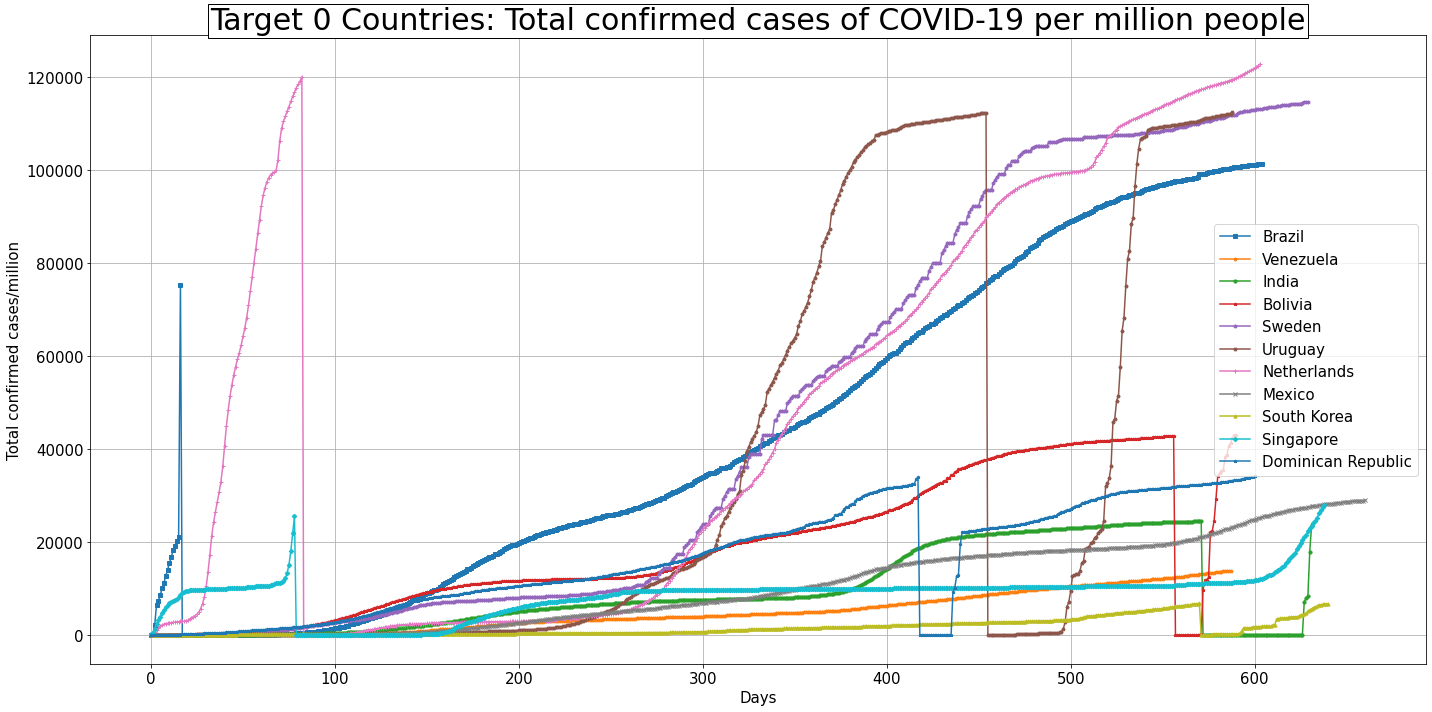

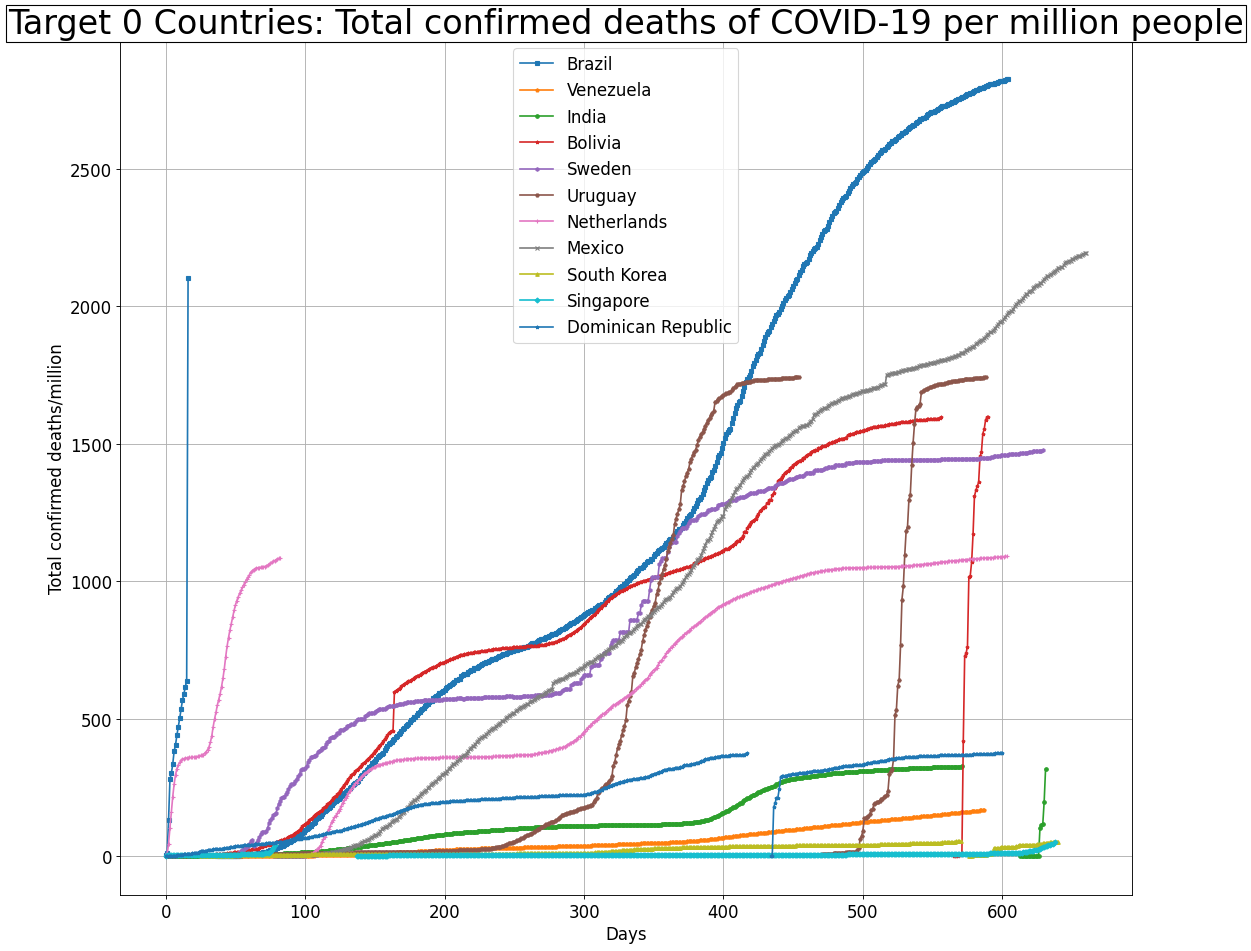

In [ ]:
## Calculo de las k:
# Las voy a calcular en función de los datos de:
cases = 'Total confirmed cases of COVID-19 per million people'
deaths = 'Total confirmed deaths due to COVID-19 per million people'

## Exploratioria de charts de muertes y casos de países que no hiciero cuarentena:
# La idea es ver en que intervalo de dias tomar los datos tanto para casos como para muertes
# y ver que comportamiento tiene la curva de muertes: Expoencial u otra.

## Países sin cuarentena:



## Ploteo en una sola figura:
# Casos:
i = 0
fig, ax = plt.subplots(figsize=[20,10])
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_0:
   casos_pais = data_2[cases][(data_2.Entity == pais)]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 0 Countries: Total confirmed cases of COVID-19 per million people', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

# Muertes:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_0:
   muertes_pais = data_2[deaths][(data_2.Entity == pais)]
   dias = np.arange(muertes_pais.shape[0]) 
   plt.plot(dias,muertes_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 0 Countries: Total confirmed deaths of COVID-19 per million people', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.ylabel('Total confirmed deaths/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

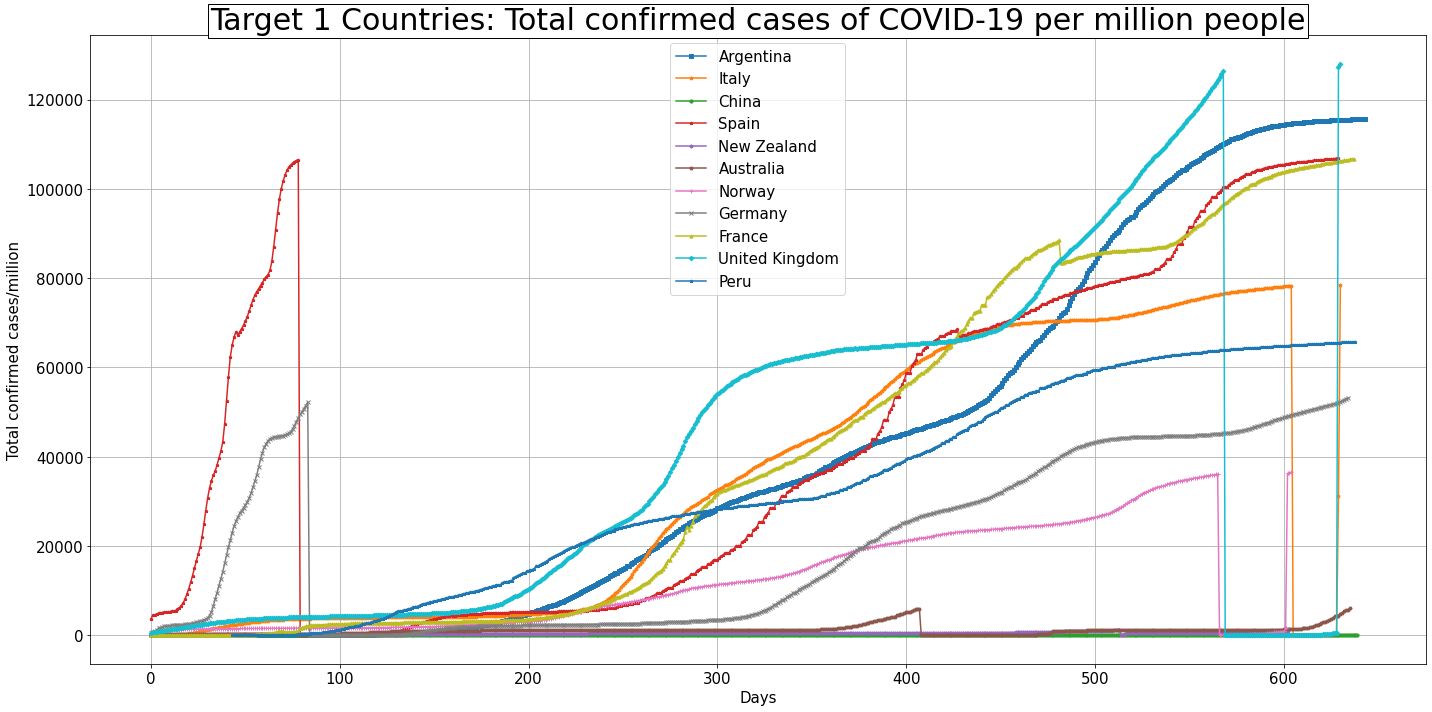

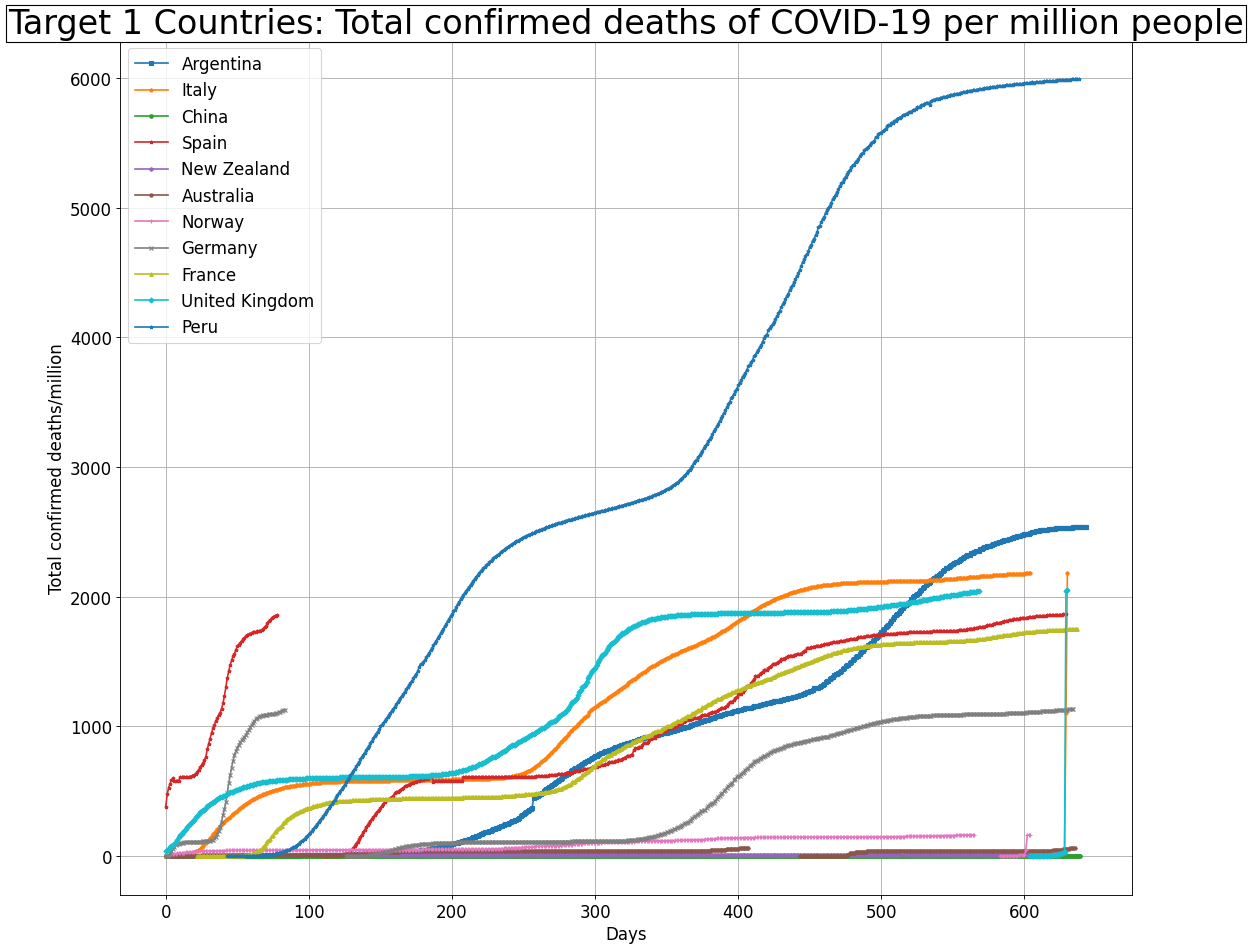

In [ ]:
## Países sin cuarentena:



## Ploteo en una sola figura:
# Casos:
i = 0
fig, ax = plt.subplots(figsize=[20,10])
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_1:
   casos_pais = data_2[cases][(data_2.Entity == pais)]
   dias = np.arange(casos_pais.shape[0]) 
   plt.plot(dias,casos_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 1 Countries: Total confirmed cases of COVID-19 per million people', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed cases/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

# Muertes:
i = 0
scale = 2
plt.figure(figsize=(8*scale, 6*scale), dpi=80)
marks = ["s","p","o","*","h","H","+","x","^","D","*"]

for pais in paises_1:
   muertes_pais = data_2[deaths][(data_2.Entity == pais)]
   dias = np.arange(muertes_pais.shape[0]) 
   plt.plot(dias,muertes_pais,label = pais, marker = marks[i], markersize = 3.2)
   i = i + 1

plt.title('Target 1 Countries: Total confirmed deaths of COVID-19 per million people', fontsize=30,bbox={'facecolor':'1','pad':2})
plt.rc('axes', labelsize =10)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Total confirmed deaths/million', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show ()

## Conclusiones del exploratorio visual de curvas: 
- Por convenciencia voy a tomar el mismo intervalo de días: 200 a 400. De los puntos anteiores, este parece ser el promedio común de comportamiento exponencial de ambas curvas, tanto la de muertes por millon como la de contagios, que respomden a estos modelos:

- $Contagios=e^{k illMil(t-t_0)}$
- $Muertes=e^{k deaths(t-t_0)}$

ARMADO DATASET

In [ ]:
data_ml.head()

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Brazil,0.0,0.0,0.0,0
1,Venezuela,0.0,0.0,0.0,0
2,India,0.0,0.0,0.0,0
3,Bolivia,0.0,0.0,0.0,0
4,Sweden,0.0,0.0,0.0,0


In [ ]:
## Calculo de k por países, y ratios y las agrego al data set que armé:
# Uso un fiteo por cuadrados mínimos exponencial:
# Lo hago para todos los países.

paises = all_paises
i = 0
for pais in paises:
    casos_pais = data_2[cases][(data_2.Entity == pais)][200:401]
    muertes_pais = data_2[deaths][(data_2.Entity == pais)][200:401]
    ratio_muertes_casos = np.mean(muertes_pais)/np.mean(casos_pais)
    dias = np.arange(200,401) 
    popt_casos , pcov_casos  = curve_fit(exponencial, dias, casos_pais, maxfev = 2000)       # Fiteo las exponenciales de casos.
    popt_muert , pcov_muert  = curve_fit(exponencial, dias, muertes_pais, maxfev = 2000)     # Fiteo las exponenciales de muertes.
    # Inserto los datos al df que voy a usar para hacer el modelo:
    data_ml.loc[i,('k_ill_mil')]          =  popt_casos[0]
    data_ml.loc[i,('k_deaths_mil')]       =  popt_muert[0]
    data_ml.loc[i,('ratio_deaths_cases')] =  ratio_muertes_casos
    i = i + 1

In [ ]:
# Data final:
data_ml = data_ml.sample(frac=1).reset_index(drop=True) # Hago un shuffle.
data_ml

,Pais,k_deaths_mil,k_ill_mil,ratio_deaths_cases,target
0,Sweden,0.994612,0.994821,0.026440,0
1,Germany,0.993289,0.994789,0.023331,1
2,Peru,0.994464,0.991910,0.096995,1
3,Uruguay,0.992983,0.991677,0.013606,0
4,Norway,0.988223,0.988082,0.008214,1
5,Bolivia,0.987388,0.994491,0.050405,0
6,Venezuela,0.994521,0.990314,0.009330,0
7,United Kingdom,0.992111,0.994975,0.030261,1
8,Singapore,0.991648,0.994281,0.000507,0
9,South Korea,0.992212,0.991439,0.016853,0


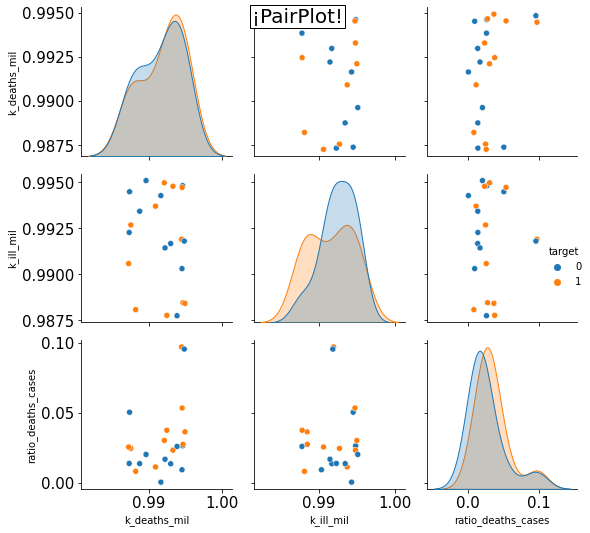

In [ ]:
g=sns.pairplot(data=data_ml[['k_deaths_mil'	,'k_ill_mil',	'ratio_deaths_cases',	'target']],hue = 'target')
g.fig.suptitle ('¡PairPlot!',fontsize=20,bbox={'facecolor':'1','pad':2})
plt.rcParams['figure.figsize'] =(20, 10)
plt.tight_layout()
plt.show()

Machine learning:
Modelo de clasifiacación ml.
Voy a usar Regresión Logística y Naive Bayes.
Uso un accuracy del 50% como benchmark. Mis modelos van a tener que ser mejores a 50% en accuracy para ser satisfactorios.

In [ ]:
## Separo mi data en X e y:
X = data_ml[['k_deaths_mil','k_ill_mil','ratio_deaths_cases']]
y = data_ml[['target']] # Paises que hicieron cuarentena: 1, Paises que no hicieron cuarentena: 0.

## Separo en train y test:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Naive Bayes:

nb = GaussianNB() # Benchmark 
nb.fit(x_train,np.array(y_train).ravel())

## Regresion logistica:

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Gauss


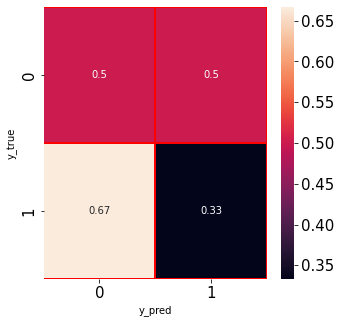

acc :  0.42857142857142855
F1 Score:  0.41666666666666663
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.33      0.33      0.33         3

    accuracy                           0.43         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.43      0.43      0.43         7

LogReg


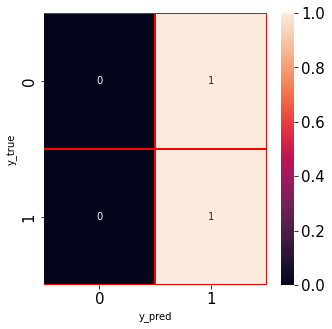

In [ ]:
#--------
## Gauss:
#--------
print('Gauss')
y_pred_nb = nb.predict(x_test)
confusion(y_test,y_pred_nb)

print("acc : ",accuracy_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test ,y_pred_nb, average='macro'))
print(classification_report(y_test, y_pred_nb))

#-----------------------
## Regresión Logistica:
#-----------------------
print('LogReg')
y_pred_logreg = logreg.predict(x_test)
confusion(y_test,y_pred_logreg)


In [ ]:
# Vemos finalmente cuanto tiempo le tomo ejecutar todo el código.
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:34.044935
